In [9]:
import numpy as np
import random
import matplotlib.pyplot as mp
import math

In [6]:
#Define the light source as flat field illumination
def lightfunc(light_source_dimensions):
    x = random.uniform(light_source_dimensions[0, 0], light_source_dimensions[0, 1])
    y = random.uniform(light_source_dimensions[1, 0], light_source_dimensions[1, 1])
    return (x,y)

#Define trajectory of a particle as a function of the distance d
def trajectory(start_coord, d):
    return start_coord

#Flat screen detection
def flatdetect(lightdim, detectordim, distance):
    ''''''
    start = lightfunc(lightdim)
    end = trajectory(start, distance)
    
    if detectordim[0,0] < end[0] < detectordim[0,1] and detectordim[1,0] < end[1] < detectordim[1,1]:
        return end, 1
    else:
        return end, 0
    
#Define control paramenters of physical experiment
light = np.array([[0, 3],
                  [0, 1]])

detector = np.array([[1, 1.8],
                     [0.2, 0.8]])
d = 10

In [3]:
#Monte Carlo testing for flat field illumination
def MCtest_FFI(light, detector, d, trials = 1000):
    
    data = np.zeros(3*trials).reshape(3, trials)
    
    for i in range(trials):
        A, b = flatdetect(light, detector, d)
        data[0,i] = A[0]
        data[1,i] = A[1]
        data[2,i] = b
        
    return data

In [7]:
#Execution
Results = MCtest_FFI(light, detector, d)

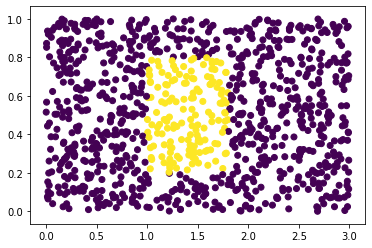

In [8]:
mp.figure()
mp.scatter(Results[0,:],Results[1,:], c=Results[2,:])
mp.show()

In [16]:
#Define light source as flat screen lambertian
def lightfunc2(light_source_dimensions, intensity):
    x = random.uniform(light_source_dimensions[0, 0], light_source_dimensions[0, 1])
    y = random.uniform(light_source_dimensions[1, 0], light_source_dimensions[1, 1])
    t = random.uniform(-90, 90)
    t = math.radians(t)
    p = random.uniform(-90, 90)
    p = math.radians(p)
    I = intensity*math.cos(t)*math.cos(p)
    return (x,y,t,p,I)

In [23]:
#Define the trajectory of particle as function of distance
def trajectory2(start_cond, d):
    w = x + d*math.tan(start_cond[2])
    z = y + d*math.tan(start_cond[3])
    return (w, z), I

In [24]:
#Flat screen detection
def flatdetect(lightdim, detectordim, distance):
    ''''''
    start = lightfunc2(lightdim)
    end, intensity = trajectory2(start, distance)
    
    if detectordim[0,0] < end[0] < detectordim[0,1] and detectordim[1,0] < end[1] < detectordim[1,1]:
        return end, I
    else:
        return end, 0

In [ ]:
#Monte Carlo testing for flat field illumination
def MCtest_lambertian(light, detector, d, trials = 1000):
    
    data = np.zeros(3*trials).reshape(3, trials)
    
    for i in range(trials):
        A, b = flatdetect(light, detector, d)
        data[0,i] = A[0]
        data[1,i] = A[1]
        data[2,i] = b
        
    return data